In [1]:
# Trabajo Práctico 1 - Métodos Computacionales
# Regresión Lineal Múltiple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.linalg import inv

# Función general para resolver la regresión lineal y calcular beta

def calcular_beta(X, y):
    return inv(X.T @ X) @ X.T @ y

# --------------------------
# PARTE 1 - Deducción teórica
# --------------------------

"""
Dado un sistema sobreajustado y = X @ beta,
se busca minimizar ||y - X beta||.

Usamos la fórmula: beta* = (X^T X)^-1 X^T y
"""

# --------------------------
# PARTE 2 - Datos sintéticos
# --------------------------


'\nDado un sistema sobreajustado y = X @ beta,\nse busca minimizar ||y - X beta||.\n\nUsamos la fórmula: beta* = (X^T X)^-1 X^T y\n'

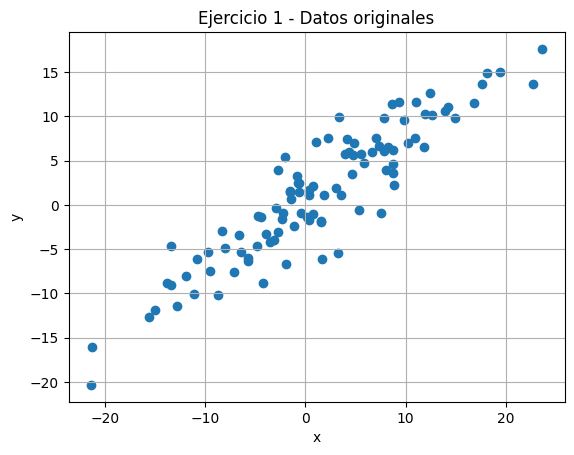

In [2]:

## EJERCICIO 1 ##

# a) Gráfico de puntos
df1 = pd.read_csv('ejercicio_1.csv')
X_raw = df1.iloc[:, 0].values
y = df1.iloc[:, 1].values

plt.scatter(X_raw, y)
plt.title("Ejercicio 1 - Datos originales")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

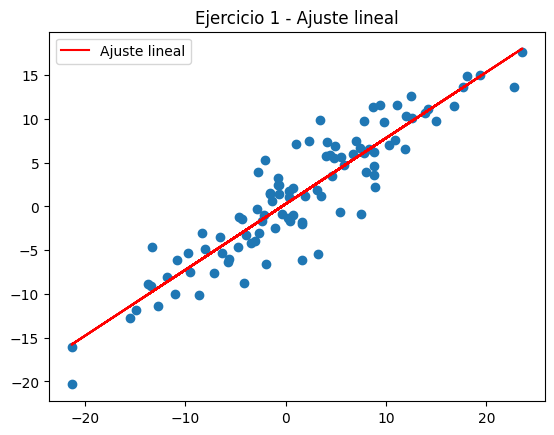

In [3]:


# b) Ajuste lineal (X con columna de unos)
X = np.vstack([X_raw, np.ones(len(X_raw))]).T
beta = calcular_beta(X, y)
y_pred = X @ beta

plt.scatter(X_raw, y)
plt.plot(X_raw, y_pred, color='red', label='Ajuste lineal')
plt.title("Ejercicio 1 - Ajuste lineal")
plt.legend()
plt.show()

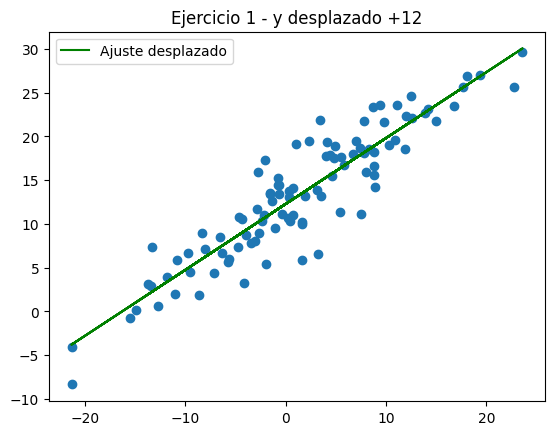

In [4]:
# c) y desplazado 12 unidades
y_desplazado = y + 12
beta_desplazado = calcular_beta(X, y_desplazado)
y_pred_desplazado = X @ beta_desplazado

plt.scatter(X_raw, y_desplazado)
plt.plot(X_raw, y_pred_desplazado, color='green', label='Ajuste desplazado')
plt.title("Ejercicio 1 - y desplazado +12")
plt.legend()
plt.show()

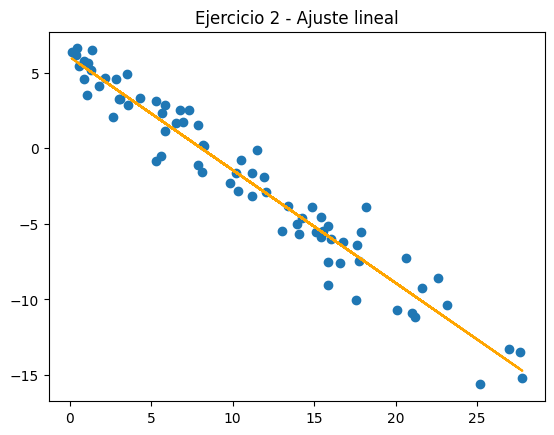

In [5]:
# d) Comentario: Para representar cualquier recta, usamos una columna de unos para intercepto.

## EJERCICIO 2 ##
df2 = pd.read_csv('ejercicio_2.csv')
X2_raw = df2.iloc[:, 0].values
y2 = df2.iloc[:, 1].values
X2 = np.vstack([X2_raw, np.ones(len(X2_raw))]).T
beta2 = calcular_beta(X2, y2)
y2_pred = X2 @ beta2

plt.scatter(X2_raw, y2)
plt.plot(X2_raw, y2_pred, color='orange')
plt.title("Ejercicio 2 - Ajuste lineal")
plt.show()

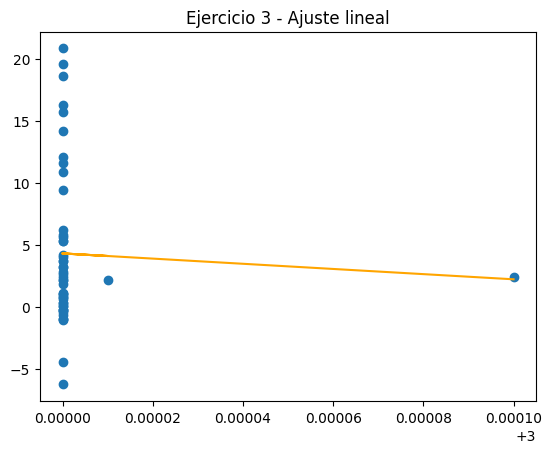

In [6]:
## EJERCICIO 3 ##
df3 = pd.read_csv('ejercicio_3.csv')
X3_raw = df3.iloc[:, 0].values
y3 = df3.iloc[:, 1].values
X3 = np.vstack([X3_raw, np.ones(len(X3_raw))]).T
beta3 = calcular_beta(X3, y3)
y3_pred = X3 @ beta3

plt.scatter(X3_raw, y3)
plt.plot(X3_raw, y3_pred, color='orange')
plt.title("Ejercicio 3 - Ajuste lineal")
plt.show()


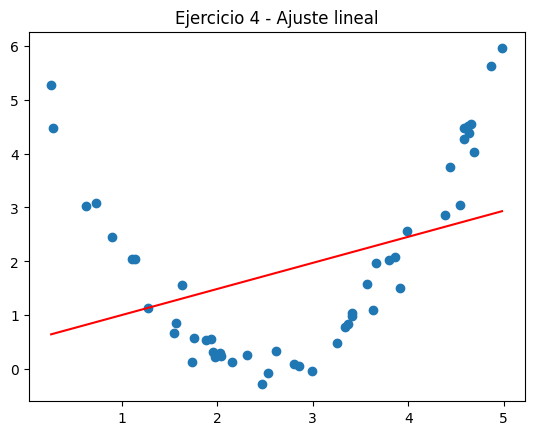

In [7]:
## EJERCICIO 4 ##
df4 = pd.read_csv('ejercicio_4.csv')
X4_raw = df4.iloc[:, 0].values
y4 = df4.iloc[:, 1].values

# a) Ajuste lineal
X4 = np.vstack([X4_raw, np.ones(len(X4_raw))]).T
beta4 = calcular_beta(X4, y4)
y4_pred = X4 @ beta4

plt.scatter(X4_raw, y4)
plt.plot(X4_raw, y4_pred, color='red')
plt.title("Ejercicio 4 - Ajuste lineal")
plt.show()

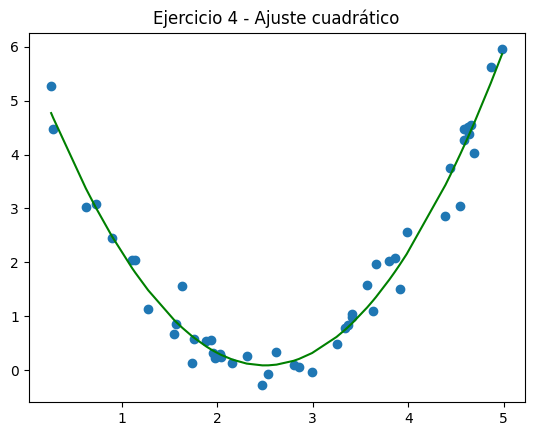

In [8]:
# b) Modelo cuadrático
X4_cuad = np.vstack([X4_raw**2, X4_raw, np.ones(len(X4_raw))]).T
beta4_cuad = calcular_beta(X4_cuad, y4)
y4_cuad_pred = X4_cuad @ beta4_cuad

plt.scatter(X4_raw, y4)
plt.plot(X4_raw, y4_cuad_pred, color='green')
plt.title("Ejercicio 4 - Ajuste cuadrático")
plt.show()

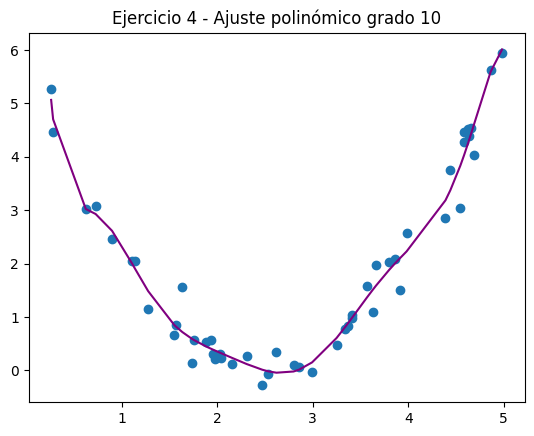

In [9]:
# d) Ajuste polinómico grado 10
X4_poly = np.vstack([X4_raw**i for i in range(10, -1, -1)]).T
beta4_poly = calcular_beta(X4_poly, y4)
y4_poly_pred = X4_poly @ beta4_poly

plt.scatter(X4_raw, y4)
plt.plot(X4_raw, y4_poly_pred, color='purple')
plt.title("Ejercicio 4 - Ajuste polinómico grado 10")
plt.show()


In [10]:
## EJERCICIO 1 ##
# Cargar el archivo CSV
df = pd.read_csv("student_performance.csv")  # Asegurate de usar la ruta correcta

# Separar variables independientes X y variable dependiente y
X = df.iloc[:, :-1].values  # Matriz de características (sin Y)
y = df.iloc[:, -1].values   # Vector de salida (Y)

# Seleccionar datos de entrenamiento (filas 0 a 449)
X_train = X[:450]
y_train = y[:450]

# Agregar columna de unos para el término independiente (bias/intercepto)
X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # [1, X1, X2, ..., X5]

# Calcular beta_hat usando la fórmula cerrada de mínimos cuadrados
XtX = np.dot(X_train_bias.T, X_train_bias)
XtY = np.dot(X_train_bias.T, y_train)
beta_hat = np.linalg.inv(XtX).dot(XtY)

# Estimar ŷ = X * beta_hat
y_hat = X_train_bias.dot(beta_hat)

# --- Punto 1 (a): Mostrar resultados
print("Parámetros β̂ (incluye intercepto al inicio):")
print(beta_hat)

# --- Punto 1 (b): Estimar ŷ = X * beta_hat para los datos de entrenamiento
y_hat = X_train_bias.dot(beta_hat)

print("\nPredicciones de Performance Index:")
print(y_hat[:450])

# --- Punto 1 (c): Calcular el Error Cuadrático Medio (ECM)
ecm = np.mean((y_train - y_hat) ** 2)

print("\nError Cuadrático Medio (ECM) en datos de entrenamiento:")
print(ecm)

## EJERCICIO 2 ##

# Seleccionar datos de test (observaciones 450 a 599)
X_test = X[450:]
y_test = y[450:]

# Agregar columna de unos para el término independiente
X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Usar los β̂ ya calculados en el punto anterior
y_test_pred = X_test_bias.dot(beta_hat)

# Calcular el Error Cuadrático Medio en el conjunto de test
ecm_test = np.mean((y_test - y_test_pred) ** 2)

# --- Punto 2 (a): Calcular el Error Cuadrático Medio (ECM)
print("Error Cuadrático Medio (ECM) en conjunto de test con β̂ del punto 1:")
print(ecm_test)

# --- Punto 2 (b): Reentrenar con los 600 datos y calcular el ECM en el test

# Reentrenar el modelo usando todos los datos (600 alumnos)
X_all_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Agregar columna de unos
beta_hat_all = np.linalg.inv(X_all_bias.T @ X_all_bias) @ (X_all_bias.T @ y)

# Predecir el rendimiento de los últimos 150 alumnos (datos de test)
X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))  # Reafirmar test con unos
y_test_pred_all = X_test_bias @ beta_hat_all

# Calcular ECM en conjunto de test usando el nuevo modelo
ecm_test_all = np.mean((y_test - y_test_pred_all) ** 2)

print("\nECM en test usando modelo entrenado con los 600 alumnos:")
print(ecm_test_all)



Parámetros β̂ (incluye intercepto al inicio):
[-34.47032228   2.8671082    1.02350298   0.55778886   0.46234696
   0.20686477]

Predicciones de Performance Index:
[91.85200597 63.18847189 44.8731422  36.37062666 67.09525783 59.36654569
 64.42586463 38.17254256 62.78745306 69.93926317 84.48902579 72.51108969
 26.81049436 33.10008416 65.61330069 47.42609051 68.26628417 71.89102101
 30.80201446 59.8643706  72.7513515  85.14973521 72.10827793 58.94746227
 39.95935991 53.67829628 63.41540422 81.88096072 74.7064765  75.00825753
 40.97949573 35.55934233 56.70408058 49.01923557 59.5136403  76.09005333
 41.70415608 69.13837099 30.17059925 63.86418297 47.38629102 39.0764522
 55.50804531 37.87601851 71.43560215 54.94499947 16.20163145 54.80440421
 57.19540615 54.5503831  27.06764767 65.89439433 71.65897354 50.90842291
 76.50325724 87.35656274 32.28629017 47.43354425 80.07548387 40.36876791
 74.61070275 95.90432855 86.48404717 49.11500932 41.13427904 72.6589449
 53.1741631  42.93177651 91.91091863

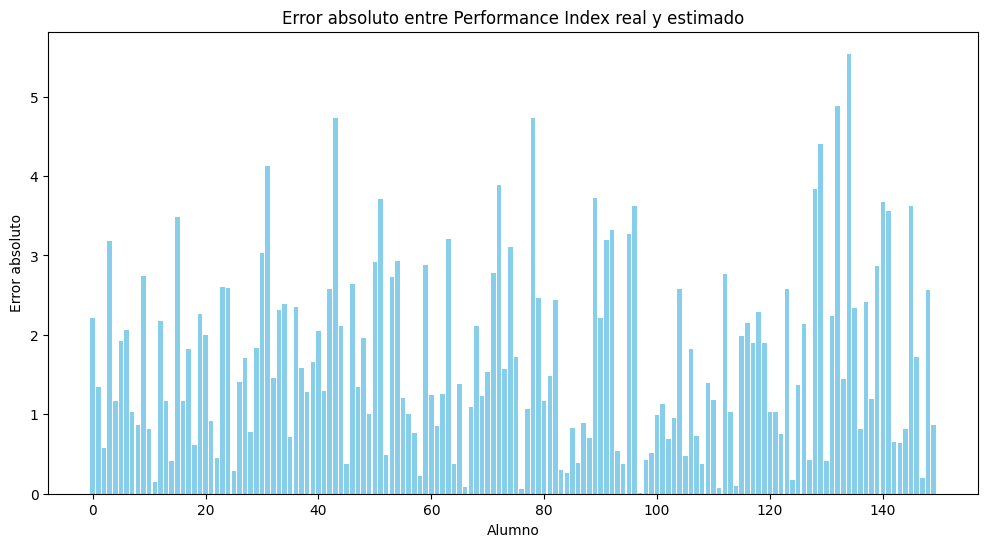

In [11]:
# --- Punto 3: Graficar el error cometido por cada estudiante. 
# Calcular error absoluto para cada estudiante en test
error_abs = np.abs(y_test - y_test_pred_all)

# Crear gráfico
plt.figure(figsize=(12, 6))
plt.bar(range(len(error_abs)), error_abs, color='skyblue')
plt.xlabel('Alumno')
plt.ylabel('Error absoluto')
plt.title('Error absoluto entre Performance Index real y estimado')
plt.show()

In [12]:
# --- Punto 4: Imaginemos que se agrega una nueva columna a los datos que informa el año en que el alumno egresa. ¿Disminuiría esto el ECM?

# Cargar datos originales
df = pd.read_csv("student_performance.csv")

# Crear la nueva columna "Year"
# Opción 1: Asignar un mismo año a todos, por ejemplo 2025
df['Year'] = 2025

# Opción 2: Crear una lista con años (ejemplo para 600 alumnos, años entre 2020 y 2025)
import numpy as np
years = np.random.choice(range(2020, 2026), size=len(df))
df['Year'] = years

# Opción 3: Si tenés un archivo o lista externa con los años, cargalo y agréguelo acá
# Ejemplo:
# years_df = pd.read_csv("years.csv")  # archivo con columna 'Year'
# df['Year'] = years_df['Year']

# Guardar el nuevo dataframe con la columna Year
df.to_csv("student_performance_with_year.csv", index=False)

print("Archivo 'student_performance_with_year.csv' creado con la nueva columna 'Year'.")


Archivo 'student_performance_with_year.csv' creado con la nueva columna 'Year'.


In [13]:
# --- Punto 4
import pandas as pd
import numpy as np

# Cargar datos con la nueva columna "Year"
df = pd.read_csv("student_performance_with_year.csv")  # ajusta el nombre si es otro

# Separar variables independientes (ahora con "Year" incluida) y dependiente
# Asumiendo que "Performance Index" sigue siendo la última columna
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Seleccionar datos de entrenamiento (primeros 450)
X_train = X[:450]
y_train = y[:450]

# Agregar columna de unos para intercepto
X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

# Calcular beta_hat con la fórmula cerrada
XtX = X_train_bias.T @ X_train_bias
XtY = X_train_bias.T @ y_train
beta_hat = np.linalg.inv(XtX) @ XtY

# Predecir en entrenamiento para calcular ECM
y_hat = X_train_bias @ beta_hat
ecm_train = np.mean((y_train - y_hat) ** 2)
print(f"ECM en entrenamiento con variable 'Year': {ecm_train}")

# Evaluar en test (filas 450 a 599)
X_test = X[450:]
y_test = y[450:]
X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_test_pred = X_test_bias @ beta_hat
ecm_test = np.mean((y_test - y_test_pred) ** 2)
print(f"ECM en test con variable 'Year': {ecm_test}")


ECM en entrenamiento con variable 'Year': 2.887039718792941
ECM en test con variable 'Year': 3.143522518536443
